In [1]:
import tensorflow as tf
print (tf.__version__)
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


2.15.0


In [2]:
(x_train, y_train), (x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

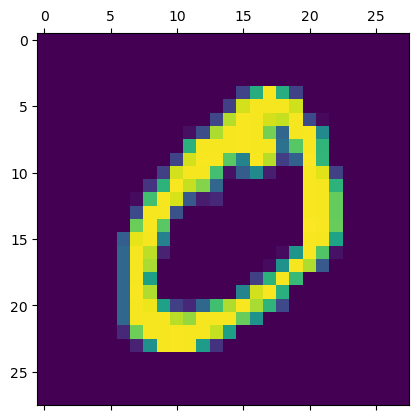

In [7]:
plt.matshow(x_train[1])

In [8]:
y_train[1]

0

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train=x_train/255
x_test=x_test/255

In [19]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [20]:
x_train_flatten.shape
x_test_flatten.shape

(10000, 784)

In [21]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 868us/step - loss: 0.4713 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 2s 944us/step - loss: 0.3040 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 886us/step - loss: 0.2833 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 868us/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 941us/step - loss: 0.2665 - accuracy: 0.9255


In [23]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 921us/step - loss: 0.2686 - accuracy: 0.9247


[0.26855409145355225, 0.9247000217437744]

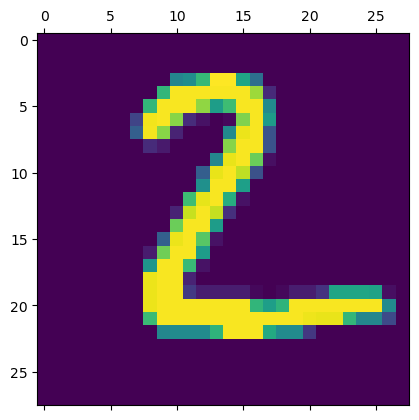

In [29]:
plt.matshow(x_test[1])

In [32]:
y_predicted=model.predict(x_test_flatten)
y_predicted[2]

313/313 [==============================] - 0s 951us/step


array([3.7733617e-04, 9.9489534e-01, 6.1656350e-01, 3.7216720e-01,
       2.8639408e-02, 1.0642215e-01, 1.8763204e-01, 1.4527327e-01,
       4.0675938e-01, 5.2055012e-02], dtype=float32)

In [31]:
np.argmax(y_predicted[1])

2

In [35]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [34]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,   13,  903,   18,    8,    4,   13,   12,   49,    5],
       [   3,    0,   14,  914,    0,   28,    2,   11,   31,    7],
       [   1,    1,    2,    2,  909,    0,   14,    4,   11,   38],
       [   8,    2,    2,   30,    7,  786,   17,    2,   32,    6],
       [  10,    3,    3,    1,    7,   11,  918,    2,    3,    0],
       [   1,    5,   20,    9,    8,    1,    0,  942,    3,   39],
       [   6,    8,    5,   16,    9,   21,   10,    8,  884,    7],
       [  10,    7,    1,    9,   25,    5,    0,   20,   13,  919]])>

Text(95.72222222222221, 0.5, 'Truth')

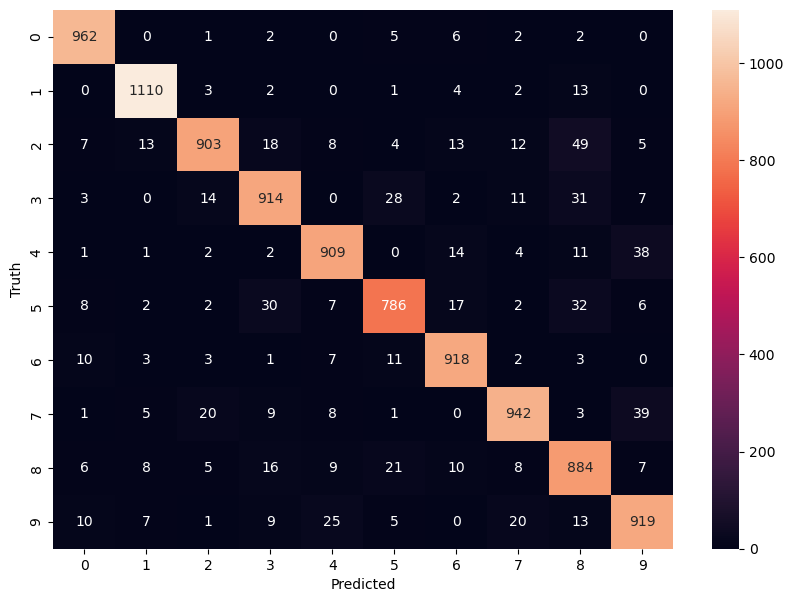

In [39]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2676 - accuracy: 0.9250
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1209 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0841 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0652 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0512 - accuracy: 0.9844


In [41]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9756


[0.07974056899547577, 0.975600004196167]

313/313 [==============================] - 0s 964us/step


Text(95.72222222222221, 0.5, 'Truth')

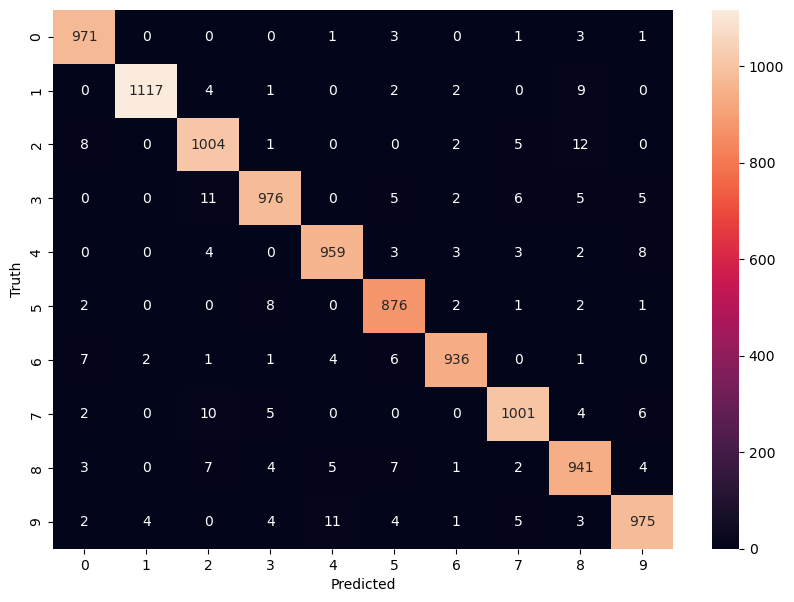

In [42]:
y_predicted=model.predict(x_test_flatten)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2781 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1215 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0871 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0665 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0534 - accuracy: 0.9832
